**Deep Learning AA 2023/2024**
** **
Teachers:\
Fabrizio Silvestri (fsilvestri@diag.uniroma1.it)\
Antonio Purificato (antonio.purificato@uniroma1.it)\
Farooq Wani (wani@diag.uniroma1.it)\
Maria Sofia Bucarelli (bucarelli.diag@uniroma1.it) \


Some libraries we will need (run the following cell)

In [ ]:
import numpy as np


Some libraries you don't need to care about, if you don't want to, but we will need to create function graphs (run the following cell)

In [ ]:
# @title import useful libraries
#import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from typing import Callable, Union, Sequence, Mapping, Optional
from sklearn.linear_model import LogisticRegression

In [ ]:
import random

# Fixing random state for reproducibility
rng = np.random.RandomState(1)

In [ ]:
# @title functions to plot graphs of functions

def plot_points3D(
    x: np.array,
    y: np.array,
    z: np.array,
    lim: int = 3,
) -> go.Figure:

    fig = go.Figure(data=[go.Scatter3d(z=z, x=x, y=y, mode= "markers" )  ], )
    fig.update_layout(
        title="Plot points 3D",
        scene=dict(
            xaxis_title="x", yaxis_title="y", zaxis_title="z"
        ),
    )
    fig.show()
    return fig

def plot_planes_and_points(
    x_input: np.array,
    y_input: np.array,
    z_input: np.array,
    m1:list,
    m2:list,
    resolution: int = 100,
    lim: int = 3,
    epsilon: float = 10,
    **kwargs
) -> go.Figure:

    x = np.linspace(-lim, lim, resolution)
    y = np.linspace(-lim, lim, resolution)

    zeta1=m1[1]*x[None, :] + m1[2]*y[:, None] + m1[0]
    zeta2=m2[1]*x[None, :] + m2[2]*y[:, None] + m2[0]

    fig = go.Figure(
        data=[
              go.Scatter3d(
                  z=z_input,
                  x=x_input,
                  y=y_input,
                  mode= "markers"
              ),
              go.Surface(
                  z=zeta1,
                  x=x,
                  y=y,
                  surfacecolor=np.ones(zeta1.shape),
                  colorscale=[[0, 'grey']],
                  name="first"
              ),
              go.Surface(
                  z=zeta2,
                  x=x,
                  y=y,
                  surfacecolor=np.zeros(zeta2.shape),
                  name="second"
              )
            ])
    fig.update_layout(
        title="Planes and Points plot",
        scene=dict(
            xaxis_title="x", yaxis_title="y", zaxis_title="z"
        ),
    )

    return fig

# the two following functions I



def plot_3Dfunctions(
    fn: Callable[[np.array, np.array], np.array],
    resolution: int = 100,
    lim: int = 3,
    ) -> go.Figure:

    x = np.linspace(-lim, lim, resolution)
    y = np.linspace(-lim, lim, resolution)
    z = fn(x[None, :], y[:, None])

    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
    fig.update_traces(
        contours_z=dict(
            show=True, usecolormap=True,
            highlightcolor="limegreen",
            project_z=True
        )
    )

    fig.update_layout(
        title="Function landscape",
        scene=dict(
            xaxis_title="x",
            yaxis_title="y",
            zaxis_title="f(x, y)"
        ),
    )

    return fig


def plot_theta_path_3Dfunctions(
    fn: Callable[[np.array, np.array], np.array],
    theta_x_path: np.array,
    theta_y_path: np.array,
    resolution: int = 100,
    lim: int = 3,
    ) -> go.Figure:
    fig = plot_3Dfunctions(
        fn,
        resolution=resolution,
        lim=lim,
    )

    theta_z_path = fn(x_path, y_path)

    fig.add_trace(
        go.Scatter3d(
            visible=True,
            showlegend=False,
            marker=dict(size=4, color="black", symbol="circle"),
            line=dict( width=3),
            x=theta_x_path,
            y=theta_y_path,
            z=theta_z_path,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            visible=True,
            showlegend=False,
            marker=dict(size=6, color="#00FF00", symbol="circle"),
            x=np.array(theta_x_path[0]),
            y=np.array(theta_y_path[0]),
            z=np.array(theta_z_path[0]),
        )
    )
    fig.add_trace(
        go.Scatter3d(
            visible=True,
            showlegend=False,
            marker=dict(size=6, color="white", symbol="circle"),
            x=np.array(theta_x_path[-1]),
            y=np.array(theta_y_path[-1]),
            z=np.array(theta_z_path[-1]),
        )
    )

    return fig




#Linear regression

Input: $ x \in \mathbb{R}^n$

Output: $ y \in \mathbb{R}$

Hypothesis: $ \hat{y} = w^T x  + b, $

Parameters:m $ \theta = [b, w ]$, $ w \in \mathbb{R}^n, b \in \mathbb{R}  $


Task: Choose $ \theta $ that minimize the mean squared error (MSE) beetween the true and the predicted output.

Suppose we have $m $ samples, we want to find

$$ \text{arg min}_{ \theta \in \mathbb{R}^{n+1}} \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2  = \text{arg min}_{ \theta \in \mathbb{R}^{n+1}} \sum_{i=1}^m (y_i - \hat{y}_i)^2 $$

$$ \mathcal{L}(\theta)=  \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2 =  \frac{1}{m}\sum_{i=1}^m (y_i - w{x}_i - b)^2 $$

 $$\underbrace{\begin{pmatrix}
\hat{y}^1 \\
\hat{y}^2 \\
\vdots\\
\hat{y}^m
\end{pmatrix}}_{\hat{y}}=
\underbrace{\begin{pmatrix}
1 &x_1^1   & \dots & x_n^1 \\
1 &x_1^2  & \dots & x_n^2 \\
\dots &\vdots  &\vdots & \vdots \\
1 &x_1^m  & \dots & x_n^m \\
\end{pmatrix}}_{X}  \underbrace{\begin{pmatrix}
b \\
w_0 \\
\vdots\\
w_{n-1}
\end{pmatrix}}_{\theta}
 $$

$$\mathcal{L}(\theta) = \frac{1}{m}(y- X \theta)^T (y - X \theta) $$

A solution is found by setting $\nabla_{\theta}\mathcal{L}(\theta)=0 :$

$$  \theta = (X^TX)^ {-1} X^T y $$


##Dataset

Synthetic 1D datasets of our creation

Synthetic 2D datasets of our creation









In [ ]:
from numpy.linalg import inv
# number training samples m
m = 100
a = [5, 2]
epsilon= 1
x =  2 *rng.rand(m) -1
y = a[1] * x + a[0] + epsilon*(2 *rng.rand(m) -1)
X = np.stack((np.ones(x.size),x[ :]), axis= 1)
print(X.shape)
theta = (np.linalg.inv( X.T @ X)  @ X.T)@ y

y_pred= theta[1] * x  + theta[0]

training_error= (y- y_pred)
training_error= (training_error@training_error)/m


#to plot

y_true= a[1] * x  + a[0]

fig = go.Figure(data=[go.Scatter( x=x, y=y, mode= "markers", name="input dataset"),
                          go.Scatter(x=x, y=y_pred, name="predicted"), go.Scatter(x=x, y=y_true, name="true")])
fig.update_layout(autosize=False,
    width=600,
    height=600,
    showlegend=True)

fig.show()

x_test =  2 *rng.rand(50) -1
y_test =  a[1] * x_test  + a[0] + epsilon*(2 *rng.rand(50) -1)
y_test_pred = theta[1] * x_test  + theta[0]
test_error = (y_test- y_test_pred)
test_error= (test_error@test_error)/50
print("predected parameters",theta)
print("real parameters", a)
print( "training error =", training_error)
#print("test error", test_error)



(100, 2)


predected parameters [4.96892369 1.97328974]
real parameters [5, 2]
training error = 0.3997720916516784


In [ ]:
a=[5, 2,3]
epsilon= 4

x =  (2 *rng.rand(100) -1)
y =  (2 *rng.rand(100) -1)
z = a[1] * x  + a[2]*y  + a[0] + epsilon*(2 *rng.rand(100) -1)

X= np.stack((np.ones(x.size),x[ :] ,y[ :]), axis=1)
print(X.shape)

theta = (np.linalg.inv(X.T @ X) @ X.T)@ z



z_pred= theta[1] * x  + theta[2]*y + theta[0]


z_true= a[1] * x  + a[2]*y + a[0]
error= (z- z_pred)
mean_square_error= np.sqrt(error@error)/100
print( "training error =", mean_square_error)
print("theta=",theta, "a=", a )

plot_planes_and_points(
    m1=[5,2,3],
    m2=theta,
    x_input=x,
    y_input=y,
    z_input=z,
    lim=1
)

(100, 3)
training error = 0.2203303592014895
theta= [4.80710366 2.10902545 2.29558289] a= [5, 2, 3]


### Exercise

After a linear model the simplest thing is a polynomial model.

Despite the name, polynomilal regression is still linear in the parameters. it is polynomial with respect to the data.

$$ y_i= \color{green}{b} + \sum_{j=1}^K \color{green}{a_{j}} x_{i}^j $$ for all data points $i=1,..,m$

In matrix notation:

$$\underbrace{\begin{pmatrix}
y_1 \\
y_2 \\
\vdots\\
y_m
\end{pmatrix}}_{\hat{y}}=
\underbrace{\begin{pmatrix}
1 &x_1   & \dots & x_1^K \\
1 &x_2  & \dots & x_2^K \\
\dots &\vdots  &\vdots & \vdots \\
1 &x_m  & \dots & x_m^K \\
\end{pmatrix}}_{X}  \underbrace{\begin{pmatrix}
b \\
a_0 \\
\vdots\\
a_{K}
\end{pmatrix}}_{\theta}
 $$

 The least-square solution of linear regression applies if $ K<n$.

In [ ]:
#Quadratic in data
m = 100
a = [2, 0,1]
epsilon= 0.4
x =  2 *rng.rand(m) -1
y = a[2]*x**2 + a[1] * x + a[0] + epsilon*(2 *rng.rand(m) -1)

x_plot = np.linspace(-1,1, 50)
y_plot_true =  a[2]*x_plot**2 + a[1] * x_plot + a[0]
y_plot_pred = theta[2]*x_plot**2 + theta[1] * x_plot  + theta[0]
fig = go.Figure(data=[go.Scatter( x=x, y=y, mode= "markers" ),
                       go.Scatter(x=x_plot, y=y_plot_true)])
fig.update_layout(autosize=False,
    width=600,
    height=600,
    showlegend=False)

fig.show()

How do we find the parameters theta in this case?

In [ ]:
# your solution...

# Gradient Descent

## Optimization
Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.


The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent (why?).

Gradient descent is based on the observation that if the multi-variable function $ f(\mathbf{x}) $ decreases fastest if one goes from  $\mathbf{x}$  in the direction of the negative gradient of $f$ at  $\mathbf{x}$.

It follows that, if

$$\mathbf{x_{n+1}} = \mathbf{x_n} - \eta \nabla f( \mathbf{x_n})$$
for a $\eta \in \mathbb{R_+}$ small enough, then
$$ f(\mathbf{x_{n+1}}) \leq f(\mathbf{x_n}). $$

The learning rate $\eta$ can also change at each step.

In [ ]:
#@title Utility plot Functions
import plotly.graph_objects as go
from typing import Callable, Union, Sequence
import math
from typing import Mapping, Union, Optional
import torch





def plot_cost_landscape(
    fn: Callable[[np.array, np.array, np.array, np.array], np.array],
    x_train : np.array,
    y_train : np.array,
    resolution: int = 100,
    lim: int = 3,
    ) -> go.Figure:

    x = np.linspace(-lim, lim, resolution)
    y = np.linspace(-lim, lim, resolution)
    grid_x,grid_y= np.meshgrid(x, y)
    z = fn(grid_x, grid_y, x_train, y_train)

    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

    fig.update_traces(
        contours_z=dict(
            show=True, usecolormap=True, highlightcolor="limegreen", project_z=True
        )
    )
    fig.update_layout(
        title="cost landscape" ,
        scene=dict(
            xaxis_title="x", yaxis_title="y", zaxis_title="Cost(x, y)"
        ),
    )
    return fig

def cost_function3D(
    x: np.array,
    y: np.array,
    x_train: np.array,
    y_train: np.array
    ) -> torch.Tensor:

    m =  y_train.shape[0]
    x_train = np.c_[np.ones(m),x_train]
    input= np.concatenate((x[None,:],y[None,:]),axis=0)
    h = sigmoid(np.matmul(input.T, x_train.T)).T
    costo = - np.sum(np.log(h[y_train>=1,:]), axis=0 )
    costo = costo - np.sum(np.log(1- h [y_train<1,:]), axis=0)
    costo = costo / m
    return costo




def plot_path_over_cost_landscape(
    fn: Callable[[np.array, np.array, np.array, np.array], np.array],
    x_path : np.array,
    y_path : np.array,
    x_train : np.array,
    y_train : np.array,
    resolution: int = 100,
    lim: int = 3,
) -> go.Figure:
    fig = plot_cost_landscape(
        fn,
        x_train=x_train,
        y_train=y_train,
        resolution=resolution,
        lim=lim,
    )

    z_path = fn(x_path, y_path, x_train, y_train)

    fig.add_trace(
        go.Scatter3d(
            marker=dict(size=4, color="white", symbol="circle"),
            line=dict(color="lightgray", width=3),
            x=x_path,
            y=y_path,
            z=z_path,
        )
    )

    return fig




We now the define a function of which we can calculate the gradient

$$ f(x,y) = \frac{1}{2} \cos(x-y) + \frac{1}{2} \sin(x+y) -  2e^{-{(x+2)}^2 - {(y+1)}^2}  $$


$
\nabla f(x,y) =
\begin{pmatrix}
\partial_x f \\
\partial_y f
\end{pmatrix}$


 $  \partial_x f= - \frac{1}{2} \sin(x-y)   + \frac{1}{2} \cos(x+y) + 4 e^{[-{(x+2)}^2 - {(y+1)]}^2}(x+2) $

$ \partial_y f=  \frac{1}{2} \sin(x-y)   + \frac{1}{2} \cos(x+y) + 4 e^{[-{(x+2)}^2 - {(y+1)]}^2}(y-1) $



In [ ]:
def my_function(x: np.array, y: np.array) -> np.array:
  z =  0.5*np.cos(x - y ) -2*np.exp(-(x+2)**2 - (y+1)**2) + 0.5* np.sin( x+ y)
  return (z)


def grad_my_function(x: np.array, y: np.array) -> np.array:
  grad_x  = - 0.5*np.sin(x - y ) +4*np.exp(-(x+2)**2 - (y+1)**2)*(x+2) + 0.5* np.cos( x+ y)
  grad_y  =   0.5*np.sin(x - y ) +4*np.exp(-(x+2)**2 - (y+1)**2)*(y+1) + 0.5* np.cos( x+ y)
  return (grad_x, grad_y)



In [ ]:
plot_3Dfunctions(fn = my_function, lim=4)

In [ ]:
def GD_optimization(
    steps: int = 20,
    learning_rate: np.float = 0.1,
    starting_point: np.array = np.zeros(2),
     )-> (np.array,np.array):
    # The starting point
    x = starting_point[0]
    y = starting_point[1]

    x_path = [x]
    y_path = [y]


    # Implementation of a simple gradient descent
    for i in range(steps):

      grad_x,grad_y= grad_my_function(x, y)
      x -= learning_rate * grad_x         # Update the first component
      y -= learning_rate * grad_y         # Update the second component
      # Add the new point the the path
      x_path.append(x)
      y_path.append(y)
    return (np.array(x_path),np.array(y_path))




<ipython-input-10-9a0b9a4c0778>:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
#opt = "RMSprop"       #@param ["SGD",  "RMSprop", "Adagrad", "Adam", "AdamW", "Adamax"]
steps = 40            #@param {type:"slider", min:0, max:200, step:5}
learning_rate =   0.1#@param {type:"number"}
#momentum = 0.24274      #@param {type:"slider", min:0, max:1.5, step:0.001}
x_starting_point =     3#@param {type:"number",min:-4, max:4 }
y_starting_point =   -2#@param {type:"number",min:-4, max:4 }


starting_point=np.array([x_starting_point,y_starting_point])
x_path, y_path = GD_optimization(
                      steps= steps,
                      learning_rate=learning_rate,
                      starting_point=starting_point )




# Let's visualize how the starting point moved aroung the surface
plot_theta_path_3Dfunctions(fn=my_function, theta_x_path=x_path, theta_y_path=y_path, lim=4)

###Exercise
Implement the momentum mechanism in the previous gradient descent algorithm.

Accumulate past gradients and keep moving in their direction:

momentum
$$\mathbf{v_{t+1}}= \lambda \mathbf{v_{t}} - \eta \nabla f(\mathbf{x_{t}}), \quad  \mathbf{v_{0}}=0 $$
$$ \mathbf{x_{t+1}} = \mathbf{x_{t}} + \mathbf{v_{t+1}}$$

In [ ]:
#

#Logistic Regression

**Classification** algorithm






Two classes $y \in \{0,1\} $  

$h_{\theta}(x) $ $= \frac{1}{1+ e^{\theta x}}$

Hot to choose the parameter $\theta$?

**Cost  function**
$
\text{Cost}(h_{\theta}(x) ,y) = \begin{cases} - \log(h_{\theta}(x)) & \text{if } y=1\\
- \log(1- h_{\theta}(x)) & \text{if } y=0 \\
\end{cases} $

We can rewrite it as :
$ \text{Cost}(h_{\theta}(x) ,y) = - y  \log(h_{\theta}(x)) - (1-y) * \log(1- h_{\theta}(x)) $


$J(\theta)= \frac{1}{m} \sum_{i=1}^m \text{Cost}(h_{\theta} (x^{(i)}), y^{(i)})= - \frac{1}{m} \sum_{i=1}^m y^{i}  \log(h_{\theta}(x^{i})) + (1-y^{i})  \log(1- h_{\theta}(x^{i})) $



Our aim: find $min_{\theta} J(\theta)$



Let $m$ be the number of samples, $n$ the number of features

 $$Y=\begin{pmatrix}
y^1 \\
y^2 \\
\vdots\\
y^m
\end{pmatrix}, \quad
1-Y=\begin{pmatrix}
1-y^1  \\
1-y^2\\
\vdots\\
1- y^m
\end{pmatrix}, \quad X =
\begin{pmatrix}
1 &x_1^1   & \dots & x_n^1 \\
1 &x_1^2  & \dots & x_n^2 \\
\dots &\vdots  &\vdots & \vdots \\
1 &x_1^m  & \dots & x_n^m \\
\end{pmatrix}  \quad
\theta^T= \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots\\
\theta_n
\end{pmatrix}
 $$


 $h_{\theta}(X)= \frac{1}{1+ e^{- X \theta^T}}  \in \mathbb{R}^m$ and $ \log(h_{\theta}(X)) \in \mathbb{R}^m $ so we can rewrite $J(\theta)$ as

$$ J(\theta)= - \frac{1}{m} [ Y \cdot \log(h_{\theta}(X)) + (1-Y) \cdot \log((1- h_{\theta}(X)))  ]$$



###Gradient Descent

$$ \theta^{n+1}= \theta^{n} - \gamma \nabla J(\theta^n)$$

In our case we can compute the derivative explicitally


We observe that

if
$\sigma(z) = \frac{1}{1+ e^{-z}}$

$\sigma'(z)=\frac{e^{-z}}{(1+ e^{-z})^2} = \frac{e^{-z} +1 - 1 }{(1+ e^{-z})^2}= \sigma(z) - \sigma(z)^2= \sigma(z) ( 1- \sigma(z) )  $

So we have,
$$\nabla J(\theta) =   \frac{1}{m} \sum_{i=1}^m -(y^{i}(1-h_{\theta}(x^i)) + (1-y^i)h_{\theta}(x^i)) x^i   = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^i)- y^i)x^i $$
So

$$\partial_{\theta_j} J(\theta) =   \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^i)- y^i)x_j^i   $$


$$ \theta^{n+1}_j= \theta^{n}_j - \gamma  \frac{1}{m} \sum_{i=1}^m (h_{\theta^n}(x^i)- y^i)x_j^i $$ simultaneusly  


Matrix notation:

$$ \theta^{n+1}= \theta^{n} - \gamma \frac{1}{m}(h_{\theta^{n}}(X)-Y)X $$







Let's now define some useful functions for logistic regression:
sigmoid
cost function, gradient,
training function

In [ ]:
def sigmoid(x):
  h= 1 / (1 + np.exp(-x))
  h[h>=0.99]=0.99
  h[h<=0.01]=0.01
  return h

def costfunction(x, y, theta):
  m = y.shape[0]
  h = sigmoid(np.dot(x, theta))
  b = - np.dot(y, np.log(h)) - np.dot((1- y),np.log(1- h))
  return b / m

def cost(x, y, theta):
  #costo1=costfunction(x, y, theta)
  m = y.shape[0]
  h = sigmoid(np.dot(x, theta))
  costo = - np.sum(np.log(h[y>=1]))
  costo = costo - np.sum(np.log(1- h[y<1]))
  return costo / m

def gradient(x, y, theta):
  m = y.shape[0]
  h = sigmoid(np.dot(x, theta))
  return (1 / m) * np.dot(h- y, x)

#quando definisci le funzioni se vuoi metti cosa devono essere i vari parametri
def training(x: np.array,
             y: np.array ,
             epochs: int  = 100,
             error: np.float = 1e-6,
             learning_rate: np.float = 0.1,
             random_initialization = False,
             starting_point: np.array = np.array([])  ):
  theta_logs = []
  #inizializzazione di theta
  #x e del tipo (n_sample, n_features)
  if random_initialization:
    theta = np.random.normal(0, 1, np.shape(x)[1])
  else:
      theta = starting_point
  theta_logs.append(theta)
  cost_logs = []
  cost_logs.append(cost(x,y,theta))
  for i in range(epochs):
    #early stopping
    if np.abs(cost(x,y,theta)) < error:
      print("early stopping! at iteration ",i)
      print(theta_logs, cost_logs, cost(x, y, theta))
      return (theta_logs,cost_logs)
    else:
      theta = theta - learning_rate*gradient(x, y, theta)
      cost_logs.append(cost(x, y, theta))
      theta_logs.append(theta)
  return (theta_logs, cost_logs)


<ipython-input-16-42b65ba76f07>:30: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-16-42b65ba76f07>:31: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
def prediction(x_test, theta):
  h = sigmoid(np.matmul(x_test, theta))
  return (h>0.5)

def accuracy(y_test, x_test, theta):
  y=y_test>0.5
  a= (prediction(x_test, theta) == y).sum()
  n=np.shape(y_test)[0]
  return a * 100 / n



### 1D artificial Datasets

Let us define three 1D artificial datasets for Logistic regression

<ipython-input-18-413b93c60ef4>:17: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



16


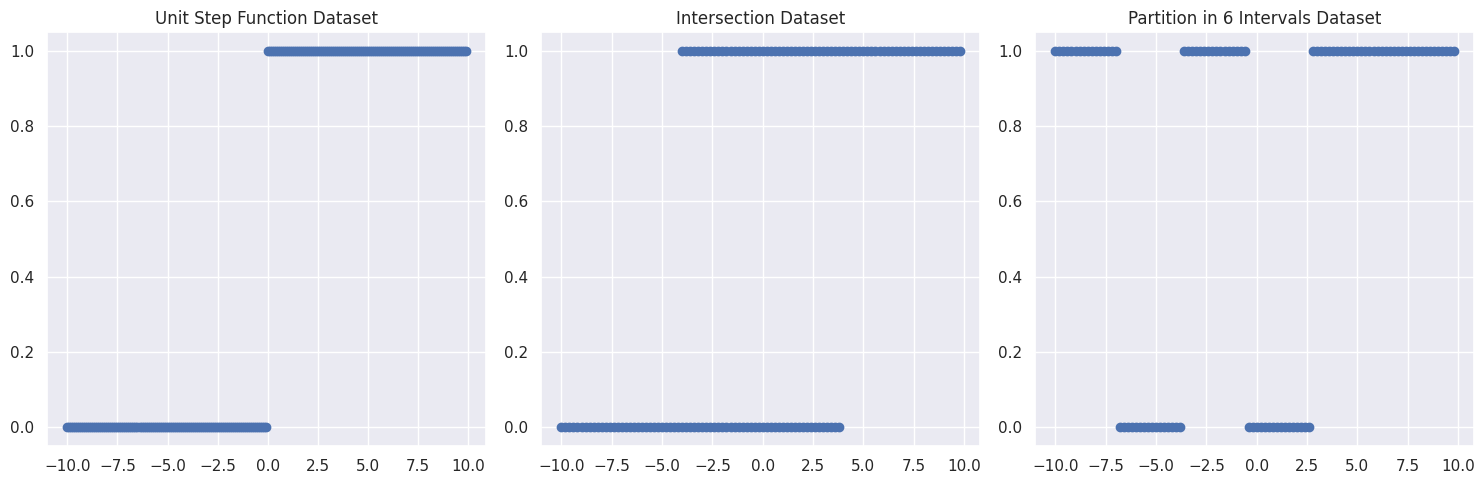

In [ ]:
def step_function_dataset (
    lim: int = 10,
    resolution: int = 100
    )-> (np.array, np.array):
    x= np.arange(-lim,lim, 2*lim/resolution)
    x = np.arange(-10,10,0.1)
    m = x.shape[0]
    y = np.concatenate((np.zeros(m//2),np.ones(m//2)))
    return (x,y)




def intersetction_dataset (
    lim: int = 10,
    resolution: int = 100,
    intesection_rate: np.float=0.2
    )->(np.array, np.array):
    x = np.arange(-lim,lim, 2*lim/resolution)
    m = x.shape[0]
    a = m//2
    b = int(m*intesection_rate)
    y=np.concatenate((np.zeros(a),np.ones(b),np.zeros(b),np.ones(a)))
    x=np.concatenate((x[: a],x[: a][-b:],x[a:][:b],x[a:]))
    return (x,y)




def partition_dataset(
    lim: int = 10,
    resolution: int = 100,
    number_intervals: int = 6
    ) -> (np.array, np.array):
    x = np.arange(-lim,lim, 2*lim/resolution)
    m = x.shape[0]
    a = m // number_intervals
    print(a)
    y = np.empty_like(x)
    y[0:a] =  np.ones(a)
    for i in range(number_intervals-1):
      if i%2==0:
        y[i*a:(i+1)*a] = np.ones(a)
      else :
        y[i*a:(i+1)*a] = np.zeros(a)
    y[(number_intervals-1)*a: ] = np.ones(m -(number_intervals-1)*a )
    return (x,y)


# Define your three datasets and titles
x, y = step_function_dataset()
x1, y1 = intersetction_dataset()
x2, y2 = partition_dataset()
titles = ["Unit Step Function Dataset", "Intersection Dataset", "Partition in 6 Intervals Dataset"]
datasets = [(x, y), (x1, y1), (x2, y2)]

# Create a figure with three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through the datasets and titles and plot them in separate subplots
for i, (dataset, title) in enumerate(zip(datasets, titles)):
    x_data, y_data = dataset
    ax = axs[i]
    ax.scatter(x_data, y_data)
    ax.set_title(title)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


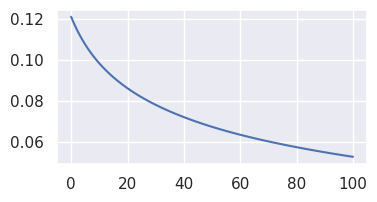

Initial cost 0.12101501508236111 Final cost 0.05283736946604634
Intial theta [0.7 0.7] Final theta [0.59420093 1.7218023 ]
Accuracy 96.96969696969697


In [ ]:
## Choose a dataset you want to work with, uncomment one of the following :

from sklearn.model_selection import train_test_split

x,y = step_function_dataset() #1
#x,y = intersetction_dataset() #2
#x,y = partition_dataset() #3


X = np.c_[np.ones_like(y), x]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42,  shuffle=True
)

starting_theta = 0.7*np.ones([X.shape[1]])

theta_log,cost_log = training(x_train,y_train, epochs=100 , error=1e-6,
                             learning_rate=0.1, starting_point=starting_theta)

plt.figure(figsize=(4, 2))
plt.plot(cost_log)
plt.show()

print("Initial cost", cost_log[0],"Final cost", cost_log[-1])
print("Intial theta", theta_log[0], "Final theta" , theta_log[-1])
print("Accuracy", accuracy(y_test, x_test,theta_log[-1]))





In [ ]:
#@title Animation theta

from matplotlib.animation import FuncAnimation
from IPython import display

def animate(frame):
  #update plot
  y= sigmoid(theta_log[frame][0]+theta_log[frame][1]*x)
  line.set_data((x,y))
  return fig

epochs=100
x = np.arange(-10,10,0.1)
fig = plt.figure()

lines = plt.plot([])
line = lines[0]
#line, = plt.plot([]) # altro comando possibile

#other set up
plt.xlim(-10,10)
plt.ylim(-0.1, 1.1)


anim = FuncAnimation(fig, animate, frames=epochs+1, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()



In [ ]:
## Choose of which dataset you want to see theta path on the surface of loss function, uncomment one of the following :

lim =  3

dataset = "step_function_dataset"  #@param ["step_function_dataset",  "intersetction_dataset", "partition_intervals"]
learning_rate = 0.21013 #@param {type:"slider", min:0, max:1, step:0.00001}
epochs = 500     #@param {type:"slider", min:1, max:500, step:1}
x_theta0 = -2.44043 #@param {type:"slider", min:-3, max:3, step:0.00001}
y_theta0 = -2.02041 #@param {type:"slider", min:-3, max:3, step:0.00001}



if dataset == "step_function_dataset":
  x,y = step_function_dataset()
elif dataset=="intersetction_dataset":
  x,y = intersetction_dataset()
else :
  x,y = partition_dataset()


X = np.c_[np.ones_like(y), x]
theta_log,cost_log = training(X, y, epochs=100 , error=1e-6,
                             learning_rate= learning_rate,
                              starting_point=np.array([x_theta0, y_theta0]))

x_path = np.array(theta_log)[:,0]
y_path = np.array(theta_log)[:,1]
print(theta_log[-1])
plot_path_over_cost_landscape(fn=cost_function3D, x_path=x_path, y_path=y_path, x_train= x, y_train= y )

[-1.26611762  2.77651991]
